In [1]:
from nbodykit.lab import *
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from IPython.display import HTML
import pandas as pd

# Figure 1

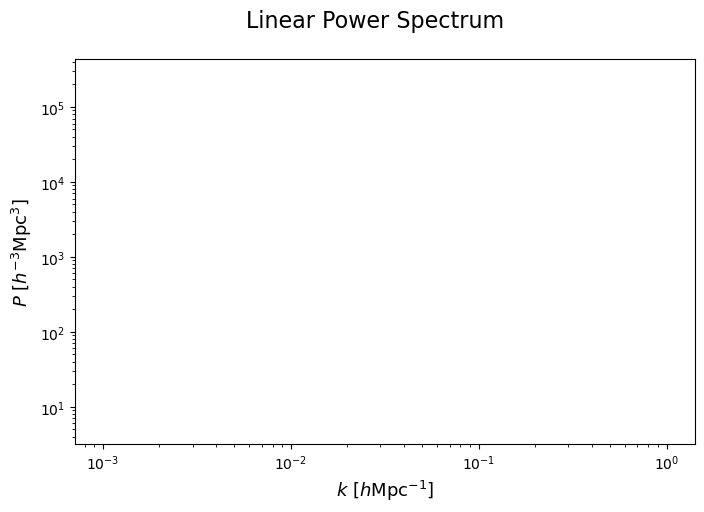

In [2]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

fig.suptitle("Linear Power Spectrum", fontsize=16)
ax.set_xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$", fontsize=13)
ax.set_ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$", fontsize=13)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='teal')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# Figure 2

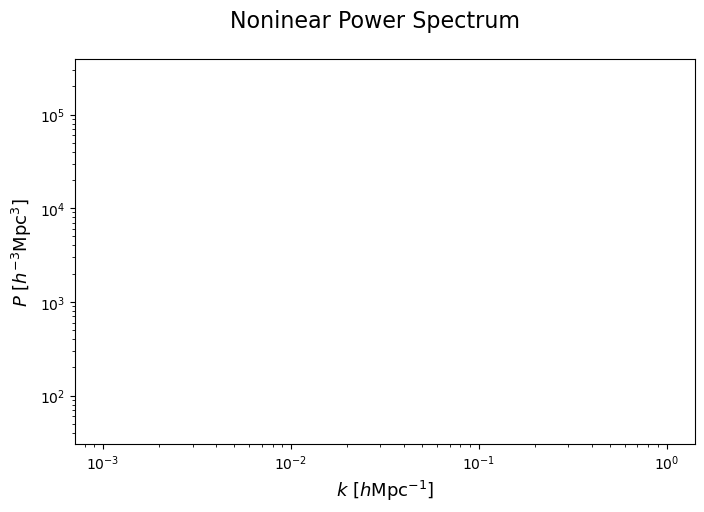

In [3]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

fig.suptitle("Noninear Power Spectrum", fontsize=16)
ax.set_xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$", fontsize=13)
ax.set_ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$", fontsize=13)

n_s_vals = np.linspace(0,2,80)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0.)

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='teal')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# Figure 3

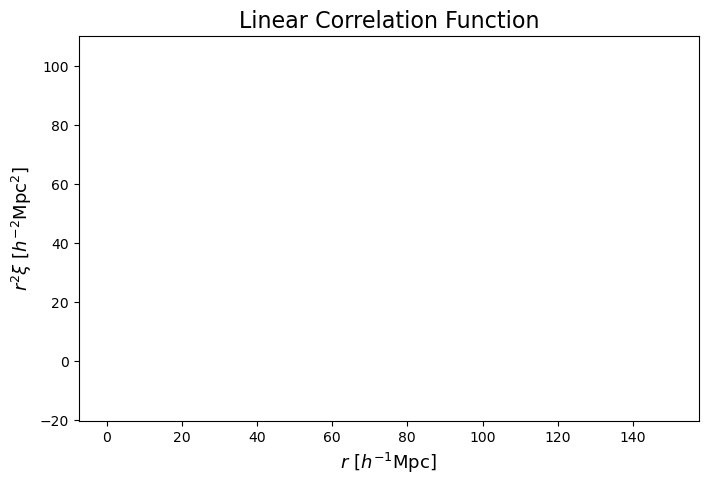

In [4]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)
ax.set_xlabel(r"$r$ $[h^{-1} \mathrm{Mpc}]$", fontsize=13)
ax.set_ylabel(r"$r^2 \xi \ [h^{-2} \mathrm{Mpc}^2]$", fontsize=13)
ax.set_title("Linear Correlation Function", fontsize=16)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    ax.text(0,100,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.plot(r, r**2 * cFunc(r), c = 'teal')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# Figure 4

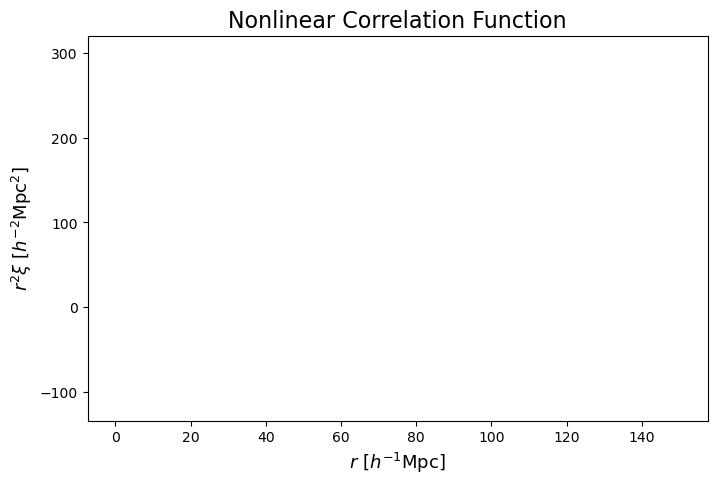

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)
ax.set_xlabel(r"$r$ $[h^{-1} \mathrm{Mpc}]$", fontsize=13)
ax.set_ylabel(r"$r^2 \xi \ [h^{-2} \mathrm{Mpc}^2]$", fontsize=13)
ax.set_title("Nonlinear Correlation Function", fontsize=16)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0.)
    cFunc = cosmology.CorrelationFunction(pSpec)

    ax.text(0,300,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.plot(r, r**2 * cFunc(r), c = 'teal')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# Figure 5

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


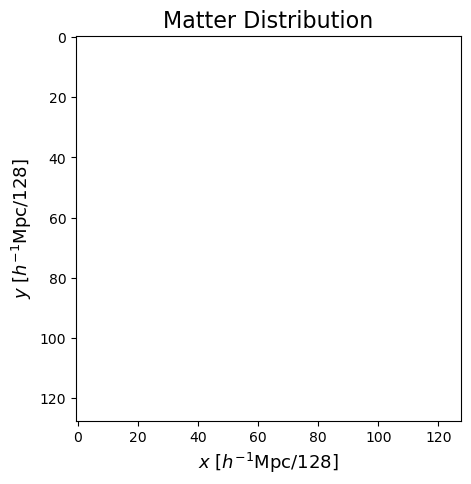

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_xlabel(r"$x$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
ax.set_ylabel(r"$y$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
ax.set_title("Matter Distribution", fontsize=16)
camera = Camera(fig)

cosmo = cosmology.Planck15

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)

    plt.imshow(mesh.preview(axes=[0,1]))
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())